# Electricity management

![The MDP](figures/electric_mdp_compact.png)

In [1]:
from utils import *
from training import *
from policies import *
from envs import *
from electrical_utils import *
import seaborn as sns

Change the parameter below to 1000 to get the plot from the thesis (takes a lot of time)

In [2]:
n_steps = 200

Training a risk-seeking policy

Batch n°199	Average length: 12.0	Mean return: -0.12762461156884927 	Mean utility: -0.12762461156884927	Mean CPT value: 0.08736482641560157	Entropy coefficient: None


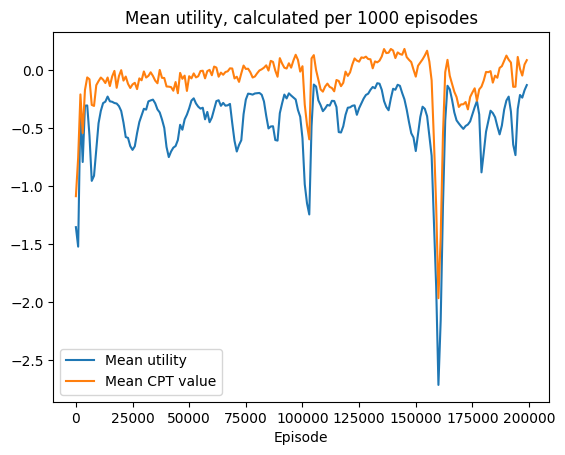

Loading best state


In [3]:
w_super_rs = (LINEAR,[9,0,0.1, 0.8,0.1])
policy_super_rs = Electric_MLP()
out_rs = train(policy_super_rs,optim.Adam(policy_super_rs.parameters(), lr=0.01),continuous=True,reinforce=False,entropy_reg=None,s=0.1,return_best=True,env=Electric(),draw_policy=True,batch_size=1000,num_episodes=n_steps,changing_s=False,adaptive_baseline = False,w = w_super_rs)

Training a risk-averse policy

Batch n°199	Average length: 12.0	Mean return: -0.24316502413888183 	Mean utility: -0.24316502413888183	Mean CPT value: -0.72554170816156	Entropy coefficient: None


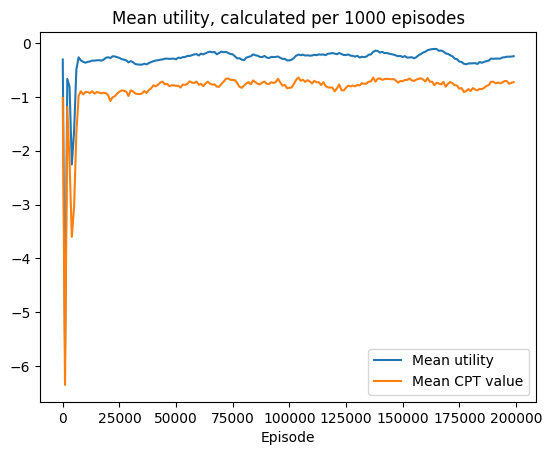

Loading best state


In [4]:
w_super_ra = (LINEAR,[0.1,0,9, -8,0.9])
policy_super_ra = Electric_MLP()
out_ra = train(policy_super_ra,optim.Adam(policy_super_ra.parameters(), lr=0.01),continuous=True,reinforce=False,entropy_reg=None,s=0.1,return_best=True,env=Electric(),draw_policy=True,batch_size=1000,num_episodes=n_steps,changing_s=False,adaptive_baseline = False,w = w_super_ra)

Training a risk-neutral policy

Batch n°199	Average length: 12.0	Mean return: -0.05801758155984089 	Mean utility: -0.05801758155984089


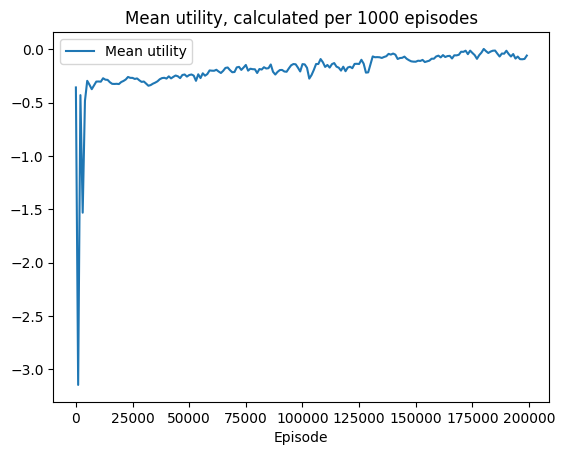

Loading best state


In [5]:
policy = Electric_MLP()
out_neutral = train(policy,optim.Adam(policy.parameters(), lr=0.01),continuous=True,reinforce=False,entropy_reg=None,s=0.1,return_best=True,env=Electric(),draw_policy=True,batch_size=1000,num_episodes=n_steps,changing_s=False,adaptive_baseline = False)

Estimating the distributions on total reward

In [6]:
LL_score_super_rs = [distribution(policy_super_rs)]
LL_score_super_ra = [distribution(policy_super_ra)]
LL_score = [distribution(policy)]

Plotting the results

Text(0.5, 0, 'Total return')

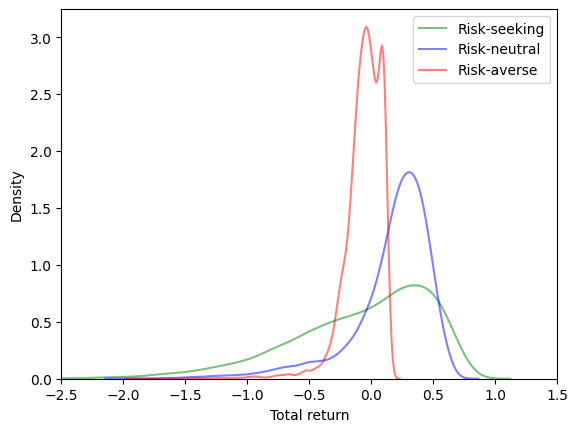

In [7]:
for i in range(len(LL_score_super_rs)):
    #sns.kdeplot(LL_score_ra[i], color='r', label='Risk-averse' if i==0 else None)
    sns.kdeplot(LL_score_super_rs[i], color='g', label='Risk-seeking' if i==0 else None,alpha=0.5)
    sns.kdeplot(LL_score[i], color='b',  label='Risk-neutral' if i==0 else None,alpha=0.5)
    #sns.kdeplot(LL_score_car[i], color='yellow',  label='car' if i==0 else None)
    #sns.kdeplot(LL_score_3s[i], color='yellow',  label='3-segment' if i==0 else None)
    sns.kdeplot(LL_score_super_ra[i], color='r',  label='Risk-averse' if i==0 else None,alpha=0.5)

    
plt.legend()
plt.xlim(-2.5,1.5)
#plt.ylim(0,0.5)
plt.xlabel('Total return')